In [191]:
'''
参考
https://qiita.com/mhangyo/items/76db7c6a6ebba6cf4330

dtypeに関する資料
http://discexuno.wp.xdomain.jp/machine-learning/python_fromfile_fromstring/

3Dfigure
https://morvanzhou.github.io/tutorials/data-manipulation/plt/3-5-3d/
'''
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2 
from scipy.fftpack import fft,ifft
import os
import glob
from pylab import *

In [192]:

#f = open(r"C:\Users\saku_\Documents\GitHub\haptic\sensor\Height_Row_0000.data",mode='rb')
#f = open(r"\\FS1\Maedalab\home\junjie-hua\wave\fourD_sensor\rawdata\20191101\test1_belly\Height\Height Row 0000.data",mode='rb')#0列目
#topo = np.fromfile(f, dtype='>f',sep='').reshape(1024,10000)
#topo = np.fromfile(f, dtype='float64',sep='').reshape(512,10000)




In [193]:
path = "//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//test1_belly//Height" #faulder
files= os.listdir(path) #all files in the faulder
s = []
n = 0

os.chdir("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//test1_belly//Height")
for file in glob.glob("*.data"): 
    #print(file)
    
    f = open(path + "//" + file ,mode='rb')#n列目
    name='topo'+str(n)  
    locals()['topo'+str(n)]= np.fromfile(f, dtype='float64',sep='').reshape(512,10000)
    print(file,"has ended")
    n = n + 1 
     
print(n)

Height Row 0000.data has ended
Height Row 0002.data has ended
Height Row 0004.data has ended
Height Row 0006.data has ended
Height Row 0008.data has ended
Height Row 0010.data has ended
Height Row 0012.data has ended
Height Row 0014.data has ended
Height Row 0016.data has ended
Height Row 0018.data has ended
Height Row 0020.data has ended
Height Row 0022.data has ended
Height Row 0024.data has ended
Height Row 0026.data has ended
Height Row 0028.data has ended
Height Row 0030.data has ended
Height Row 0032.data has ended
Height Row 0034.data has ended
Height Row 0036.data has ended
Height Row 0038.data has ended
Height Row 0040.data has ended
Height Row 0042.data has ended
Height Row 0044.data has ended
Height Row 0046.data has ended
Height Row 0048.data has ended
Height Row 0050.data has ended
Height Row 0052.data has ended
Height Row 0054.data has ended
Height Row 0056.data has ended
Height Row 0058.data has ended
Height Row 0060.data has ended
Height Row 0062.data has ended
Height R

In [194]:
#print(topo)
#print(topo[200])
#print(topo[:1])
#print(len(topo[511]))

In [ ]:
# To csv file


In [196]:
'''
color map
'''

#names = locals()
#k = names['topo' + str(251) ][511,5000]
#print(type(k))



names = locals()
def f(x,y): 
    k = names['topo'+str(y)][x,5000]
    #k = topo251[511,5000]
    return k

#print(f(511,251))

# X, Y value
x = np.linspace(0,512-1,512)
y = np.linspace(0,252-1,252)
X,Y = np.meshgrid(x,y)



Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]

for i in range(X.shape[0]):
    #print(i)
    for j in range(X.shape[1]):
        #print(j)
        Z[i][j] = f(j,i)

Z_array=np.array(Z)# turn list into array

# 3D グラフを作成する。
ax2 = fig.add_subplot(111, projection="3d", facecolor="w")
ax2.set_title("surface")
ax2.plot_surface(X, Y, Z_array)

plt.show()

E:\anaconda\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1717: RuntimeWarning: overflow encountered in double_scalars
  avgzsum = sum(p[2] for p in ps2)
E:\anaconda\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  avgzsum = sum(p[2] for p in ps2)
E:\anaconda\lib\site-packages\numpy\core\numeric.py:1766: RuntimeWarning: overflow encountered in multiply
  tmp = array(a2 * b1)
E:\anaconda\lib\site-packages\numpy\core\numeric.py:1768: RuntimeWarning: overflow encountered in multiply
  multiply(a2, b0, out=cp1)
E:\anaconda\lib\site-packages\numpy\core\numeric.py:1769: RuntimeWarning: overflow encountered in multiply
  multiply(a0, b2, out=tmp)
E:\anaconda\lib\site-packages\numpy\core\numeric.py:1770: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp
E:\anaconda\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:73: RuntimeWarning: overflow encountered in double_scalars
  return np.sqrt(v[0]**2+v[1]**2+v[2

E:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in absolute
  # This is added back by InteractiveShellApp.init_path()
E:\anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in absolute
  if sys.path[0] == '':
E:\anaconda\lib\site-packages\matplotlib\ticker.py:1910: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


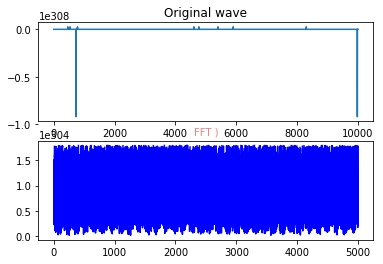

In [197]:
'''
color mapで見たいデータ域の詳しい情報を見る
'''

n=0
x=np.linspace(0,10000-1,10000)  
y=topo0[n]
yy=fft(y)                     #fft
yreal = yy.real               # real of fft
yimag = yy.imag               # imag of fft
yf=abs(fft(y))                # 
yf1=abs(fft(y))/len(x)           #normalization
yf2 = yf1[range(int(len(x)/2))]  #
xf = np.arange(len(y))        # frequency
xf1 = xf
xf2 = xf[range(int(len(x)/2))]  #half

plt.subplot(211)
plt.plot(topo0[n])#n-1行目，0~10000flame 
plt.title('Original wave')
plt.subplot(212)
plt.plot(xf2,yf2,'b')
plt.title('FFT )',fontsize=10,color='#F08080')

plt.show()
